# Исследование данных о российском кинопрокате



## Открою файлы с данными и объединю их в один датафрейм.


- План работ:
1. обьеденить два датафрейма и изучить.
1. Проверить типы данных в датафрейме и преобразовать там, где это необходимо.
2. Изучить пропуски в датафрейме. Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать.
3. Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.
4. Изучить столбцы, которые содержат категориальные значения:
5. Посмотреть, какая общая проблема встречается почти во всех категориальных столбцах;
6. Исправить проблемные значения в поле type.
7. Изучить столбцы, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные.
8. Добавить новые столбцы:
9. Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма;
10. Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
11. Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.
12. Посмотреть, сколько фильмов выходило в прокат каждый год. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных.
13. Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной? С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделайть выводы.
14. Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.
15. Поискать интересные закономерности в данных. Посмотреть, сколько выделяют средств на поддержку кино. Проверите, хорошо ли окупаются такие фильмы, какой у них рейтинг. 
16. Написать общий вывод

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_movies = pd.read_csv(r"C:\Users\SubKi\Downloads\data_sets\mkrf_movies.csv")

In [3]:
df_shows = pd.read_csv(r"C:\Users\SubKi\Downloads\data_sets\mkrf_shows.csv")

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [6]:
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [7]:
pd.set_option("display.float_format", "{:.2f}".format)

In [8]:
df_shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


- Изучил данные через head и экспоненциальный формат перевёл в более удобный

In [9]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [10]:
df_shows['puNumber'] = df_shows['puNumber'].astype('str')

In [11]:
df = df_movies.merge(df_shows, on='puNumber', how= 'outer')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

- Изучил данные, гистограммы буду строить после предобработки данных, так как тип столбцов может быть неправильным и гистограмма не будет отображать данные корректно.

In [13]:
df_shows.shape[0]

3158

In [14]:
df_shows['box_office'].count()

3158

In [15]:
df_shows['box_office'].head()

0        2450.00
1       61040.00
2   153030013.40
3    12260956.00
4   163684057.79
Name: box_office, dtype: float64

In [16]:
df['box_office'].count() 

3158

In [17]:
if df_shows['box_office'].count() == df['box_office'].count():
    print("Box office количество данных совпадает")
else:
    print("Box office значения не соответствуют")

Box office количество данных совпадает


In [18]:
check_df = df.shape[0]  # создаем переменную с размером датасета до преобразования
check_df

7486

### Промежуточный вывод

- Ознакомился с данными, обьеденил два датафрейма. Оставил номер прокатного удостоверения в формате object. Вычисления с ним не нужны используется как айди для фильмов. При переводе в int, в некоторых строчках некоректно перводится(в коде добавляется точка с 0). После обьединения датафрейма данные из второго датафрейма перенесены в полном обьёме.

## Предобработка данных

### Проверить типы данных

- Проверю типы данных в датафрейме и преобразую их там, где это необходимо.

### Преобразую названия столбцов и столбец с датами  в более корректный формат

In [19]:
df = df.rename(columns = {'puNumber': 'pu_number'})

In [20]:
df.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [21]:
df['show_start_date'].tail()

7481    2010-05-04T12:00:00.000Z
7482    2010-05-14T12:00:00.000Z
7483    2015-04-23T12:00:00.000Z
7484    2011-12-27T12:00:00.000Z
7485    2014-05-15T12:00:00.000Z
Name: show_start_date, dtype: object

In [28]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'])

In [30]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y.%m.%dT%H:%M:%S')

In [31]:
df['show_start_date'].head()

0   2012-08-24 12:00:00+00:00
1   2010-01-14 12:00:00+00:00
2   2011-01-13 12:00:00+00:00
3   2012-01-16 12:00:00+00:00
4   2013-01-17 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

### Исправлю в рейтинге значения где был знак процента и приведу к значению большинства

In [32]:
df['ratings'] = df['ratings'].astype('str')

In [33]:
def perсent_to_rate (number_string):
    if number_string.endswith("%"):
        number_string = number_string.rstrip("%")
        number_string = float(number_string) / 10
    return float(number_string)

In [34]:
df['ratings'] = df['ratings'].apply(perсent_to_rate)
df['ratings'].tail()

7481   7.40
7482   7.40
7483   7.20
7484   6.70
7485    NaN
Name: ratings, dtype: float64

In [ ]:
df.info()

- Тип данных столбцов был приведён в более подходящее для исследования состояние.

### Изучу пропуски в датафрейме 

In [35]:
temp = df.copy() # создаю копию датасета до преобразования
len(temp)

7486

In [36]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [37]:
df['film_studio'].isna().sum()

18

In [38]:
df[df['film_studio'].isna()].head(20)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
68,Брови,111000719,2019-03-01 12:00:00+00:00,Художественный,NaN,Россия,О.Штром,"В.Максимов, В.Степанов, Г.Киракосян, О.Штром",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Топливо,111001419,2019-02-12 12:00:00+00:00,Художественный,NaN,Россия,М.Архипов,М.Архипов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.10,"короткометражка,фантастика",NaN
277,Путешествие в Париж,111002919,2019-03-01 12:00:00+00:00,Художественный,NaN,Россия,М.Олейник (псевдоним - Мария Полякова),Н.Савко,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.00
1782,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
1849,Последнее фото,112014518,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,Е.Севастьянов,Е.Севастьянов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df = df.dropna(subset=['film_studio']).reset_index(drop=True)

- В столбце «film_studio» есть 18 пропущенных значений, это мало, возможно, эти фильмы были сняты без участия студий или не были указаны по другим причинам. Большинство данных, таких как рейтинг, господдержка и сборы в кинотеатрах, отсутствуют. Эти пропуски можно удалить, поскольку по этим строкам не удастся провести анализ между собой из-за отсутствия важных данных.

In [40]:
df['production_country'].isna().sum()

1

In [41]:
df[df['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
111,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00


In [42]:
df.loc[3185, 'production_country'] = 'Россия'

In [43]:
df['production_country'].isna().sum()

1

- В столбце «Страна производства» было одно пропущенное значение. Так как есть ценные данные, такие как рейтинг, жанр и сборы, решил оставить, страна производства — Россия, заполнил строчку правильным значением. Можно было просто удалить, на общий результат один пропуск бы сильно не повлиял.

In [44]:
df['director'].isna().sum()

8

In [45]:
df[df['director'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5857,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5916,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
6000,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN
6054,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6060,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.00
6327,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6332,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6333,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df = df.dropna(subset=['director']).reset_index(drop=True)

- Исходя из типа фильмов, режиссёры не были внесены специально. Скорей всего, работала группа людей над монтажом проекта, и выделить главного было затруднительно. В этих пропусках отсутствуют данные по жанру, сборам и господдержке, что лишает ценности. Можно удалить пропуски без вреда для датафрейма и исследования.

In [47]:
df['producer'].isna().sum()

564

In [48]:
df[df['producer'].isna()].head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Белые ночи.,111000815,2015-02-05 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм""",Россия,Л.Квинихидзе,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,музыка",NaN
81,Горе от ума.,111000915,2015-02-05 12:00:00+00:00,Художественный,Киностудия им. М.Горького,СССР,"С.Алексеев, В.Войтецкий",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.00,драма,197464.50
148,Ленин в 1918 году.,111001616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Ромм,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"драма,биография,история",NaN
156,Ленин в Польше,111001716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Творческое объединение ...","СССР, Польша",С.Юткевич,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.40,"драма,история",NaN
159,Служба доставки,111001719,2019-02-25 12:00:00+00:00,Художественный,Копцев Владимир Александрович,Россия,"В.Копцев, Е.Копцева",NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.00,"аниме,мультфильм,фэнтези",NaN
165,Ловцы губок,111001816,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Захариас,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Любовь Серафима Фролова,111001916,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Туманов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,мелодрама,NaN
185,"Киноальманах ""Молодость"". Выпуск 1-й",111002016,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"Г.Мыльников, Б.Токарев, А.Сиренко",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,драма,комедия",NaN
195,Люди в океане,111002116,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,П.Чухрай,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.60,"боевик,драма",NaN


- В этом столбце уже ощутимое количество пропущенных значений. Другие столбцы имеют достаточно полезных данных. Удалить без вреда не получится. Оставлю пропуски как есть, так как нет адекватной альтернативы на замену.

In [49]:
df['refundable_support'].isna().sum()

7128

In [50]:
df[df['refundable_support'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.00,"комедия,военный",NaN
2,И не было лучше брата,111000111,2011-01-13 12:00:00+00:00,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,детектив,NaN
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
4,Тайна перевала Дятлова,111000113,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.10,"ужасы,фантастика",2450.00


- Слишком много пропущенных данных, которые нельзя заменить на альтернативу. Пропуски в этом столбце потому, что данные по поддержке фильмов неизвестны или отсутствуют. Оставлю как есть, чтобы не вредить иследованию.

In [51]:
df['nonrefundable_support'].isna().sum()

7128

In [52]:
df[df['nonrefundable_support'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.00,"комедия,военный",NaN
2,И не было лучше брата,111000111,2011-01-13 12:00:00+00:00,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,детектив,NaN
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
4,Тайна перевала Дятлова,111000113,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.10,"ужасы,фантастика",2450.00


- Слишком много пропущенных данных, которые нельзя заменить на альтернативу. Пропуски в этом столбце потому, что данные по поддержке фильмов неизвестны или отсутствуют. Оставлю как есть, чтобы не вредить иследованию.

In [53]:
df['budget'].isna().sum()

7128

In [54]:
df[df['budget'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.00,"комедия,военный",NaN
2,И не было лучше брата,111000111,2011-01-13 12:00:00+00:00,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,детектив,NaN
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
4,Тайна перевала Дятлова,111000113,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.10,"ужасы,фантастика",2450.00


- Слишком много пропущенных данных, которые нельзя заменить на альтернативу. Пропуски в этом столбце потому, что данные по поддержке фильмов неизвестнаы или отсутствуют. Оставлю как есть, чтобы не вредить иследованию.

In [55]:
df['financing_source'].isna().sum()

7128

In [56]:
df[df['financing_source'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.00,"комедия,военный",NaN
2,И не было лучше брата,111000111,2011-01-13 12:00:00+00:00,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,детектив,NaN
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
4,Тайна перевала Дятлова,111000113,2013-01-17 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.10,"ужасы,фантастика",2450.00


- Слишком много пропущенных данных, которые нельзя заменить на альтернативу. Пропуски в этом столбце потому, что данные, кем финансированы фильмы, неизвестны или отсутствуют. Оставлю как есть, чтобы не вредить иследованию.

In [57]:
df['ratings'].isna().sum()

948

In [58]:
df[df['ratings'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,"А.С.Пушкин ""Сказка о Царе Салтане""",111000219,2019-01-18 12:00:00+00:00,Художественный,"ООО ""ВИАРТИСТ""",Россия,Е.Егоров,"М.Батков, С.Старых, Г.Мустафин",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Апостасия,111000317,2017-01-18 12:00:00+00:00,Художественный,"ООО ""ТПО Кинокомпания М2Ф""",Россия,А.Мурадов,"А.Мурадов, Р.Филатов, А.Голодницкий",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,20:17,111000418,2018-01-26 12:00:00+00:00,Художественный,"ООО ""Компания ""Новые люди""",Россия,"А.Занин, М.Архипов, Н.Барабаш, А.Костандакес, ...",Н.Мокрицкая,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.00,60000000.00,148585222.00,Фонд кино,NaN,NaN,1445731797.89


- В этом столбце уже ощутимое количество пропущенных значений. Другие столбцы имеют достаточно полезных данных. Удалить без вреда не получится. Оставлю пропуски как есть, так как нет адекватной альтернативы на замену.

In [59]:
df['genres'].isna().sum()

957

In [60]:
df[df['genres'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,"А.С.Пушкин ""Сказка о Царе Салтане""",111000219,2019-01-18 12:00:00+00:00,Художественный,"ООО ""ВИАРТИСТ""",Россия,Е.Егоров,"М.Батков, С.Старых, Г.Мустафин",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Апостасия,111000317,2017-01-18 12:00:00+00:00,Художественный,"ООО ""ТПО Кинокомпания М2Ф""",Россия,А.Мурадов,"А.Мурадов, Р.Филатов, А.Голодницкий",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,20:17,111000418,2018-01-26 12:00:00+00:00,Художественный,"ООО ""Компания ""Новые люди""",Россия,"А.Занин, М.Архипов, Н.Барабаш, А.Костандакес, ...",Н.Мокрицкая,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.00,60000000.00,148585222.00,Фонд кино,NaN,NaN,1445731797.89


- В этом столбце уже ощутимое количество пропущенных значений. Другие столбцы имеют достаточно полезных данных. Удалить без вреда не получится. Оставлю пропуски как есть, так как нет адекватной альтернативы на замену.

In [61]:
df['box_office'].isna().sum()

4304

In [62]:
df[df['box_office'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Паранормальный Якутск,111004112,2012-08-24 12:00:00+00:00,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.00,"комедия,военный",NaN
2,И не было лучше брата,111000111,2011-01-13 12:00:00+00:00,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,детектив,NaN
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",NaN
5,Шагал-Малевич,111000114,2014-01-13 12:00:00+00:00,Художественный,"ООО ""Мармот-фильм""",Россия,А.Митта,"Л.Шнайдерман, А.Митта",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.10,"биография,история",NaN


- Слишком много пропущенных данных, которые нельзя заменить на альтернативу. Пропуски в этом столбце потому, что данные по сборам неизвестны или отсутствуют. Оставлю как есть.

- Не стал заполнять пустые значения в столбцах с множестовом пропусков, потому что либо нет адекватной замены пропущенным значениям в столбцах, таких как бюджет, поддержка или сборы. Этих пропусков слишком много и фильмы в любом случае имели свой бюджет, который мы не сможем узнать. Также пропуски в таких столбцах как гос поддержка указаны только там, где эта поддержка была зафиксированно, здесь можно предпологать что зарубежные фильмы не могли спонсироваться нашим фондом кино, поэтому логично там поставить 0, но это сильно повлияет на среднее и данные. Строки, где пропуски не несли полезные данные, я удалил или исправил.

In [63]:
df.duplicated().sum()

0

- Полных дубликатов в данных нет

In [64]:
df[df['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6863,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN
7264,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


In [65]:
df[df['title'] == 'Анализируй это!']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6862,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
7222,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN


In [66]:
df[df['director'] == 'Зенке Вортманн']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2720,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
7195,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
7264,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


In [67]:
df[df['director'] == 'Гарольд Реймис']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6863,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [68]:
df['director'].value_counts()

director
О.Семёнова                                   47
Стивен Содерберг                             17
Д.Червяцов                                   17
Ридли Скотт                                  16
Тиль Швайгер                                 14
                                             ..
Джастин Бальдони                              1
Д.Киселев, А.Котт, А.Баранов, Л.Габриадзе     1
Оливье Накаша, Эрик Толедано                  1
Г.Добрыгин                                    1
Дэвид Маллет                                  1
Name: count, Length: 4797, dtype: int64

In [69]:
def replace_wrong_values(wrong_values, correct_value): 
    for wrong_value in wrong_values: 
        df['director'] =  df['director'].str.replace(wrong_value, correct_value) 

duplicates = ['ХЭрольд Рэмис']
name = 'Гарольд Реймис' 
replace_wrong_values(duplicates, name) 

In [70]:
# столбцы с одинаковыми значениями которые состовляют более 95%
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

refundable_support: 95.54960%
refundable_support
NaN             7128
0.00             221
20000000.00       12
25000000.00       10
10000000.00       10
5000000.00         9
15000000.00        9
50000000.00        8
40000000.00        8
30000000.00        7
60000000.00        6
100000000.00       5
110000000.00       2
55000000.00        2
19000000.00        2
75000000.00        2
41000000.00        1
7153119.00         1
38000000.00        1
36000000.00        1
150000000.00       1
26000000.00        1
80000000.00        1
29000000.00        1
8000000.00         1
28000000.00        1
180000000.00       1
17000000.00        1
44000000.00        1
3500000.00         1
7346881.00         1
9000000.00         1
35000000.00        1
7000000.00         1
115000000.00       1
Name: count, dtype: int64

nonrefundable_support: 95.54960%
nonrefundable_support
NaN            7128
25000000.00      53
30000000.00      48
35000000.00      29
40000000.00      26
               ... 
8000000.00    

In [71]:
df['title'].duplicated().sum()

713

- Посмотрев дубликаты по разным столбцам, пришёл к выводу, что дубликаты в названии фильмов зависят от прокатных лицензий. Некоторые фильмы получали больше одной в разные временные промежутки. Это могло произойти по разным причинам, таким как переснятый материал или смена владельца прав на фильм. Также среди режиссёров нашёл одну фамилию, которую написали другим способом, и исправил её.

Для нахождения неявных дубликатов напишу функцию, которая исправит во всех категориальных столбцах заглавные буквы на строчные, удалит пробелы до, после и заменит «ё» на «е». Такие проблемы всречаются почти во всех категориалбных столбцах.

In [72]:
def corect_values(x):
    return str(x).replace('ё', 'е').lower().strip()

In [73]:
# Выбираем категориальные столбцы
categorical_columns = df.select_dtypes('object').columns

In [74]:
categorical_columns

Index(['title', 'pu_number', 'type', 'film_studio', 'production_country',
       'director', 'producer', 'age_restriction', 'financing_source',
       'genres'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7460 entries, 0 to 7459
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7460 non-null   object             
 1   pu_number              7460 non-null   object             
 2   show_start_date        7460 non-null   datetime64[ns, UTC]
 3   type                   7460 non-null   object             
 4   film_studio            7460 non-null   object             
 5   production_country     7459 non-null   object             
 6   director               7460 non-null   object             
 7   producer               6896 non-null   object             
 8   age_restriction        7460 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [76]:
df.duplicated().sum()

0

In [77]:
df['title'].duplicated().sum()

713

In [78]:
# Применяем функцию только к категориальным столбцам
for column in categorical_columns:
    df[column] = df[column].apply(corect_values)

In [79]:
df.duplicated().sum()

0

In [80]:
df['title'].duplicated().sum()

725

In [81]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,паранормальный якутск,111004112,2012-08-24 12:00:00+00:00,художественный,ип тимофеев к.п.,россия,к.тимофеев,nan,«16+» - для детей старше 16 лет,NaN,NaN,NaN,nan,NaN,nan,NaN
1,небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,художественный,"киностудия ""ленфильм"", зао ""киновидеообъединен...","ссср, россия",и.цветов (режиссер ч/б фильма - с.тимошенко),"зао ""киновидеообъединение ""крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,nan,8.00,"комедия,военный",NaN
2,и не было лучше брата,111000111,2011-01-13 12:00:00+00:00,художественный,"ооо ""ибрус"" при поддержке киностудии ""азербай...",россия - азербайджан,м.ибрагимбеков,"м.ибрагимбеков, а.швыдкой, д.шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,nan,6.70,детектив,NaN
3,"детский юмористический киножурнал ""ералаш"", вы...",111000112,2012-01-16 12:00:00+00:00,художественный,"ооо ""ералаш""",россия,"в.панжев, г.курлаев, и.белостоцкий, м.сулейман...","ооо ""ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,nan,7.20,"детский,комедия",NaN
4,тайна перевала дятлова,111000113,2013-01-17 12:00:00+00:00,художественный,"ооо ""нон-стоп продакшн""",россия,ренни харлин,"а.роднянский, с.мелькумов, с.беспалов, киа джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,nan,5.10,"ужасы,фантастика",2450.00


In [82]:
check_df

7486

In [83]:
check_df_midle = df.shape[0]
check_df_midle

7460

In [84]:
difference_check_df = check_df - check_df_midle

Исправил категориальные столбцы от возможных опечаток с регистром, пробелами и буквой «ё». Исходный набор строк сохранён  на 99.7% на текущем этапе, что достаточно для исследования.

####  работа над ошибками .  <font color='DarkBlue'><b> несмотря на то, что повторяющиеся фильмы имеют разные прокатные удостоверения, в данных строках нет данных о бюджетах, господдержке, поэтому удаление дубликатов могло быть оправданным, но это уберёт актуальные данные которые можно использовать для другого иследования. Решил оставить. </b></font>

In [ ]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(a, b, round((a-b)/a*100, 2))

In [ ]:
df['title'].duplicated().sum()

In [ ]:
df.info()

Пропущенные значения и дубликаты были устраненны где это было возможно приступаю к анализу данных.

In [ ]:
check_df

In [ ]:
check_df_final = df.shape[0]

In [ ]:
difference_check_df = check_df - check_df_final

In [ ]:
percentage = round((difference_check_df / check_df) * 100, 2)
print('во время обработки, был убран', percentage,'% от всех данных')

Исправил категориальные столбцы от возможных опечаток с регистром, пробелами и буквой «ё». Исходный набор строк сохранён больше чем на 90%, что достаточно для исследования, и, учитывая, что были удалены дубликаты фильмов, которые не помогали бы исследованию, а мешали, датафрейм стал чище.

####  работа над ошибками .   <font color='DarkBlue'><b>Основной проблемой всех категориальных столбцов являются неявные дубликаты, которые могут появляться по техническим причинам, так и при человеческой ошибке при вводе.</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Согласно заданию, необходимо найти общую проблему в категориальных данных. Надо ее описать в промежуточном выводе.</font>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Рекомендуется для анализа количественных данных посмотреть сводную статистику: `df.describe()`.</font>

In [ ]:
df.describe()

In [ ]:
df['budget'].mean()

In [ ]:
df['budget'].median()

In [ ]:
df['budget'].max()

In [ ]:
df.query('budget > 2000000000')

In [ ]:
plt.figure(figsize=(5, 5))
ax = df['budget'].hist(bins=50, grid=True, xlabelsize=14, ylabelsize=14)

# Переименование осей
ax.set_xlabel('Бюджет, млрд.', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Бюджет фильмов', fontsize=18)

# Отображение графика
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Красивые и информативные графики всегда приветствуются, особенно когда на них есть все подписи осей, названия меток и название графика. Как правило, заказчик не является аналитиком и ему трудно по коду разбираться, что изображено на диаграммах. Кроме того, в презентацию реального проекта в основном идут именно скрины графиков, таблицы мало информативны. По этому необходимо сразу графики максимально описывать.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
plt.figure(figsize=(5, 5))
ax = df.boxplot(column= 'budget', grid=True)

# Переименование осей
ax.set_ylabel('Бюджет, млрд.', fontsize=14)

# Переименование таблицы
plt.title('Бюджет фильмов', fontsize=18)

# Отображение графика
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

бюджет в 2.5 млрд кажется выбросом, но на самом деле на этот фильм действително потратили такую сумму, которая не оправдалась.

In [ ]:
df['refundable_support'].mean()

In [ ]:
df['refundable_support'].median()

In [ ]:
df['refundable_support'].max()

In [ ]:
df.query('refundable_support == 180000000')

In [ ]:
plt.figure(figsize=(6, 5))
ax = df['refundable_support'].hist(bins=10, grid=True, xlabelsize=14, ylabelsize=14)

# Переименование осей
ax.set_xlabel('возвратная поддержка, до 200 млн.', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Возвратная поддержка', fontsize=18)

# Отображение графика
plt.show()

График выглядит нормально в пределах ожидаемого.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
plt.figure(figsize=(5, 5))
ax = df.boxplot(column= 'refundable_support', grid=True)

# Переименование осей
ax.set_ylabel('Бюджет, до 200 млн.', fontsize=14)

# Переименование таблицы
plt.title('Возвратная поддержка', fontsize=18)

# Отображение графика
plt.show()

больше половины значений отсутсвуют, что равнозначно нулю. максимальные значения графика не являются выбросами. Просто высокие затраты на эти фильмы.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
df.query('refundable_support >= 120000000')['refundable_support'].count()

In [ ]:
df.query('refundable_support >= 120000000')

В зоне выброса реальные фильмы, с реальными бюджетами

In [ ]:
df['nonrefundable_support'].mean()

In [ ]:
df['nonrefundable_support'].median()

In [ ]:
df['nonrefundable_support'].max()

In [ ]:
plt.figure(figsize=(8, 5))
ax = df['nonrefundable_support'].hist(bins=15, grid=True, xlabelsize=14, ylabelsize=14)

# Переименование осей
ax.set_xlabel('невозвратная поддержка, до 400 млн.', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('невозвратная поддержка', fontsize=18)

# Отображение графика
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
plt.figure(figsize=(5, 5))
ax = df.boxplot(column= 'nonrefundable_support', grid=True)

# Переименование осей
ax.set_ylabel('Бюджет, млн.', fontsize=14)

# Переименование таблицы
plt.title('невозвратная поддержка', fontsize=18)

# Отображение графика
plt.show()

In [ ]:
df[df['nonrefundable_support'] == 0]['title'].count()

In [ ]:
df[df['nonrefundable_support'] == 0]

больше половины значений отсутсвуют. максимальные значения графика не являются выбросами. Просто высокие затраты на эти фильмы.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
df.query('nonrefundable_support >= 300000000')['title']

In [ ]:
df['ratings'].mean()

In [ ]:
df['ratings'].median()

In [ ]:
plt.figure(figsize=(5, 5))
ax = df['ratings'].hist(bins=30, grid=True, xlabelsize=14, ylabelsize=14)

# Переименование осей
ax.set_xlabel('Рейтинг в балах', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Рейтинг фильмов', fontsize=18)

# Отображение графика
plt.show()

Данные были исправленны в 1.2.2. Гистограма выглядит нормальной в пределах ожидаемого.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
plt.figure(figsize=(15, 5))
ax = df['show_start_date'].hist(bins=30, grid=True, xlabelsize=14, ylabelsize=14)

# Переименование осей
ax.set_xlabel('Года выхода фильмов', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Дата премьеры фильмов', fontsize=18)

# Отображение графика
plt.show()

На графике не видно выбросов основноая тенденция выхода фильмов сохраняется. Ежегодно выходит не меньше 150 фильмов. Есть крайне плодотворные года где вышло около 400 фильмов. В 2011, 2015 и 2019

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
df['box_office'].mean()

In [ ]:
df['box_office'].median()

In [ ]:
df['box_office'].max()

In [ ]:
df['box_office'].min()

In [ ]:
plt.figure(figsize=(10, 5))
ax = df['box_office'].hist(bins=50, grid=True, xlabelsize=14, ylabelsize=14)

# Переименование осей
ax.set_xlabel('сбор, млн.', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Сборы фильмов в рублях', fontsize=18)

# Отображение графика
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
df_without_sssr = df.query('production_country != "ссср"')

In [ ]:
plt.figure(figsize=(10, 5))
ax = df_without_sssr['box_office'].hist(bins=50, grid=True, xlabelsize=14, ylabelsize=14)

# Переименование осей
ax.set_xlabel('сбор, млрд.', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Сборы фильмов в рублях', fontsize=18)

# Отображение графика
plt.show()

Сборы свыше полутора милиарды выглядят выбросом. проверю что это за фильмы

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
df.query('box_office == 3073568690.79')

По данным сторонних ресурсов, у фильма и вправду были высокие сборы.

In [ ]:
#df = df_without_sssr.query('box_office > 10000')

In [ ]:
plt.figure(figsize=(5, 5))
ax = df.boxplot(column= 'box_office', grid=True)

# Переименование осей
ax.set_ylabel('Бюджет, млн.', fontsize=14)

# Переименование таблицы
plt.title('сборы фильмов в рублях', fontsize=18)

# Отображение графика
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

In [ ]:
df.query('box_office >= 1500000000')['box_office'].count()

In [ ]:
df.query('box_office <= 10000')['box_office'].count()

In [ ]:
df['sum_support'] = df['nonrefundable_support'] + df['refundable_support']

In [ ]:
df[df['title'] == 'любовь с ограничениями']

In [ ]:
df.query('sum_support > budget')['title'].count()

In [ ]:
df.query('sum_support > budget').head()

In [ ]:
df.shape[0]

In [ ]:
df = df.query('budget != 0')

In [ ]:
df.shape[0]

In [ ]:
check_df

In [ ]:
check_df_final = df.shape[0]

In [ ]:
difference_check_df = check_df - check_df_final

In [ ]:
percentage = round((difference_check_df / check_df) * 100, 2)
print('во время обработки, был убран', percentage,'% от всех данных')

Анамалия при которой гос поддержка больше чем бюджет фильма заключается в том, что в этих данных бюджет равен 0. 
Проведя анализ значений графиков убедился что выбросов или дефектов не осталось. Данные готовы к иследованию. Выдающиеся значения найдены и иследованны. они соответствуют действительности. Данные готовы к работе. Убрал аномальные данные. 0.57% от всего датафрейма. 

####  работа над ошибками <font color='DarkBlue'><b>В датафрейм были данные, где бюджет равен 0 при выплаченой гос. поддержке, такое быть не может. Это анамалии, такие строчки я удалил в виду малого количества.</b></font><br>.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В соответствии с заданием колонка бюджета содержит полную господдержку. Из этого вытекает следствие о возможной аномалии или ошибке, если в датасете есть фильмы, у которых бюджет меньше полной господдержки.<br>Так же необходимо сделать промежуточные выводы по этому разделу.</font>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [ ]:
df['year_of_release'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [ ]:
def filter_on_first(first):   
    return first.split(',')[0].split(';')[0]
df['main_director'] = df['director'].apply(filter_on_first)
df['main_genre'] = df['genres'].apply(filter_on_first)

In [ ]:
df.head(10)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Чтобы рассчитать долю государственной поддержки в общем бюджете фильма, нужно разделить сумму государственной поддержки на общий бюджет фильма и умножить на 100%.
Например, если государственная поддержка составила 10 млн рублей, а общий бюджет фильма — 50 млн рублей, то доля государственной поддержки будет равна: (10 / 50) * 100% = 20%.

In [ ]:
df['share_support'] = (df['sum_support'] / df['budget'])* 100

####  работа над ошибками <font color='DarkBlue'><b>создал столбец с долей гос. поддержки от бюджета фильма</b></font><br>.


In [ ]:
#df_refundable_support = df.query('refundable_support > 0')

In [ ]:
#df_refundable_support['refundable_support'].count()

In [ ]:
#df.query('box_office >= 0 ').count()

In [ ]:
#df_nonrefundable_support = df.query('nonrefundable_support > 0')

In [ ]:
#df_nonrefundable_support['nonrefundable_support'].count()

In [ ]:
#df_nonrefundable_support['refundable_support'].mean()

In [ ]:
#df_nonrefundable_support['nonrefundable_support'].mean()

In [ ]:
#df_nonrefundable_support['budget'].mean()

In [ ]:
#((df_nonrefundable_support['refundable_support'].mean()/df_nonrefundable_support['budget'].mean()) * 100).round(2)

In [ ]:
#((df_nonrefundable_support['nonrefundable_support'].mean()/df_nonrefundable_support['budget'].mean()) * 100).round(2)

In [ ]:
check_df

In [ ]:
check_df_final = df.shape[0]

In [ ]:
difference_check_df = check_df - check_df_final

In [ ]:
percentage = round((difference_check_df / check_df) * 100, 2)
print('во время обработки, был убран', percentage,'% от всех данных')

добавил столбцы по  главному жанру, имени режисёра и столбец с долей господдержки от основного бюджета фильмов.
Исправил категориальные столбцы от возможных опечаток с регистром, пробелами и буквой «ё». Исходный набор строк сохранён где то на 99.4%, что достаточно для исследования

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не создана колонка с долей господдержки в общем бюджете фильма.</font>
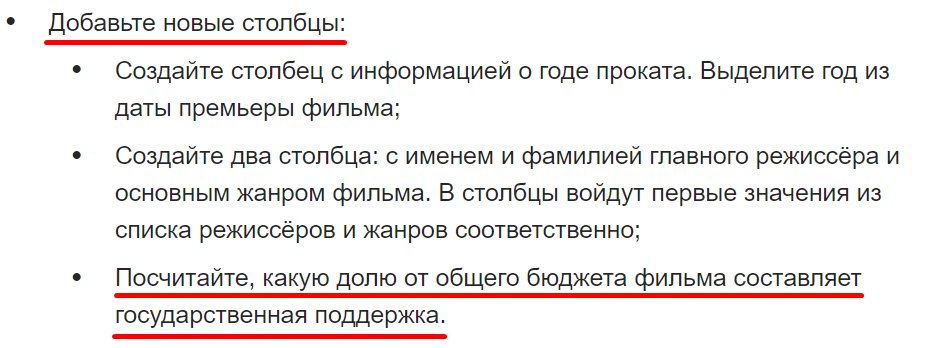

вывод.
- Преобразовал тип данных в столбце с датами в более удобный для работы.
- Исправил в столбце с рейтингом значения отличные от основных.
- иследовал пропущенные значения, где были пропуски и отсуствовали полезные для иследования данные в малом количестве  такие удалил, где была воозможность исправил. Слишком много пропущенных данных в столбцах «Гос. поддержка», «Бюджет» и «Источник финансирования», которые нельзя заменить на альтернативу. Пропуски в этом столбце потому, что данные по фильмам неизвестны или отсутствуют. Оставлю как есть, чтобы не вредить исследованию. В столбцах «Рейтинг» и «Жанр» не так много пропущенных значений, но всё равно достаточно, чтобы была необходимость их сохранить, они хранят достаточно полезных данных. В столбце со сборами есть только известные данные. Множество пропусков связаны с отсутствием информации по сборам. Адекватной замены нет. Удалять тоже нельзя. Также пропуски в таких столбцах, как «Гос. поддержка», указаны только там, где эта поддержка была зафиксирована, здесь можно предполагать, что зарубежные фильмы не могли спонсироваться нашим Фондом кино, поэтому логично там поставить 0, но это сильно повлияет на среднее и данные. Строки, где пропуски не несли полезных данных, я удалил или исправил.
- Исправил опечатки в категориальных столбцац. Полных дубликатов не добавилось. Удалил неявные дубликаты в названиях фильмов. Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков.
- Провёл исследование числительных столбцов. По гистограммам видно, что основные значения в нормальном распределении или в пределах ожидаемых. Значения, которые выбивались из адекватных, являются уникальными, но настоящими случаями, такие как высокий бюджет «Тайны печати дракона» или высокие сборы фильма «Холоп». Устранил аномалию, при которой гос. поддержка больше, чем бюджет фильма.
- Добавил столбцы по главному жанру, имени режиссёра, с годом выхода фильма и с долей господдержки от основного бюджета фильмов. Исходный набор строк сохранён где-то на 99,4%, что достаточно для исследования.

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Здесь ожидаются обобщающие выводы по разделу предобработки данных.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Раздел предобработки должен заканчивать обобщающим промежуточным выводом.</font>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?


In [ ]:
df.info()

In [ ]:
df.query('box_office == 0')['title'].count()

In [ ]:
df['box_office'].isna().sum()

In [ ]:
df['title'].count()

In [ ]:
df.query('box_office > 0')['title'].count()/df['title'].count() * 100

In [ ]:
df['films_with_budget'] = df['box_office'] > 0
df['films_with_budget'].head()

In [ ]:
df.groupby('year_of_release')['films_with_budget'].sum()/df.groupby('year_of_release')['title'].count() * 100

In [ ]:
plt.figure(figsize=(15, 5))
#ax = df.groupby('year_of_release')['films_with_budget'].mean().plot(grid= True)
ax = (df.groupby('year_of_release')['films_with_budget'].sum()/df.groupby('year_of_release')['title'].count() * 100).plot(grid= True)

# Переименование осей
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('%', fontsize=14)

# Переименование таблицы
plt.title('Доля от датфрейма, фильмов с известным прокатом по годам', fontsize=18)

# Отображение графика
plt.show()

Доля фильмов с указанной информацией о прокате в кинотеатрах начала сильно расти с 2014 года и с 2015 не опускалась ниже 50%. Наиболее полный период был в 2017 году, где доля фильмов с известным прокатом составляла 70%. Наименьший — в 2010.

In [ ]:
df_box_office = df.query('box_office > 0')

In [ ]:
df_box_office.info()

In [ ]:
df_box_office.groupby('year_of_release')['title'].count()

In [ ]:
plt.figure(figsize=(15, 5))
ax = df_box_office.groupby('year_of_release')['title'].count().plot(grid= True)

# Переименование осей
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Динамика проката по годам где известны сборы', fontsize=18)

# Отображение графика
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
ax = df.groupby('year_of_release')['title'].count().plot(grid= True)

# Переименование осей
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Количество фильмов', fontsize=14)

# Переименование таблицы
plt.title('Динамика проката по годам по всем фильмам', fontsize=18)

# Отображение графика
plt.show()

По графику видно: шёл рост до 2016 года, а затем был ощутимый спад в 2017-м и снова рост. Возможно, на выход фильмов повлияло обсуждение законопроекта о сборе в 5 млн. за прокатное удостоверение, что привело к активному разговору индустрии с Министерством культуры и к консолидации профессионального сообщества. В целом по всем фильмам можно сказать, что их количество от года к году нестабильно, но меньше 500 фильмов ежегодно не выходит, или легко может выходить под 1000. 

In [ ]:
df_box_office.groupby('year_of_release')['share_support'].mean()

In [ ]:
plt.figure(figsize=(15, 5))
ax = df_box_office.groupby('year_of_release')['box_office'].mean().plot(grid= True)

# Переименование осей
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('млрд', fontsize=14)

# Переименование таблицы
plt.title('Сборы по годам', fontsize=18)

# Отображение графика
plt.show()

В датафрейме находятся данные начиная с 2013 года. Видна динамика среднего роста сборов. Высокие сборы в 2017 году связаны с высокими сбороми одиночных уникальных фильмов. В этом году также вышло мало фильмов что могло вызвать у людей "голод" по кинотетру.

#### работа над ошибками  <font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Что является фактом выхода в прокат фильма? Наличие сборов в прокате. Не все фильмы с установленной датой премьеры попадают в прокат, а здесь это не учтено. В итоге сделан анализ всех фильмов, а не вышедших в прокат, что требуется в задании.</font><br>
<font color='Red'>🛠 Вот, что написано в задании: <br><b>Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам.</b> <br>А это не сделано.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что написано в задании: <br><b>Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?</b> <br>А это не сделано.</font>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [ ]:
df.columns

In [ ]:
df.pivot_table(columns = 'year_of_release', values = 'box_office', aggfunc = {'mean', 'median'}).applymap(lambda x: '%.2f' % x)

In [ ]:
df_box_office.pivot_table(columns = 'year_of_release', values = 'box_office', aggfunc = {'mean', 'median'}).applymap(lambda x: '%.2f' % x)

In [ ]:
df_without_low_box = df_box_office.query('box_office > 10000').pivot_table(columns = 'year_of_release', values = 'box_office', aggfunc = {'mean', 'median'}).applymap(lambda x: '%.2f' % x)
df_without_low_box

Среднее значение в 2019 завышено за счёт фильма «Холоп», который принёс хорошую прибыль. По медиане видно, что другие фильмы принесли кассы меньше, чем за предыдущий год. По таблице заметно, как сборы ежегодно увеличиваются, хотя и есть просадки между некоторыми годами 2016 и 2018. Но тенденция роста кассы заметна.  Из-за фильмов, где неверно или ошибочно были указаны заниженные сборы, медиана была очень маленькой, убрав эти выбросы, удалось получить более реальное медианное значение.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Средняя и медианная сумма сбора существенно отличаются - средняя сумма сборов оказывается в разы выше медианной. Это значит, что среди фильмов есть явные звезды, приносящие своим создателям существенную долю от общего проката. А сборы большей части фильмов весьма скромные.</font>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Можно сократить строку колонки возрастной категории до значения возраста в кавычках, для этого следует извлечь из строки символы до разделителя `-`.</font>

In [ ]:
pivoted_df = df_box_office[df_box_office['year_of_release'] >= 2015].pivot_table(index='year_of_release', columns ='age_restriction',values='box_office')

In [ ]:
ax = pivoted_df.plot(kind='bar', title='Сборы фильма по возрастному ограничению', figsize=(18, 6))
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('млрд', fontsize=14)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

По диаграмме видно, что больше всего собирают фильмы от 6 и 12 лет, остальные возраста идут примерно одинаково от года в год. В 2017 вероятно также вышло больше анимационных проектов с таким ограничением, поэтому он так вырвался.

Вывод. С 2014 года наблюдается стабильный рост доли фильмов с известной информацией о прокате в кинотеатрах, которая не опускалась ниже 50% с 2015 года. В 2017 году доля таких фильмов достигла максимума в 70%. Это может быть связано с обсуждением законопроекта о сборе в 5 млн рублей за прокатное удостоверение, что активизировало диалог между индустрией и Министерством культуры и способствовало консолидации профессионального сообщества.
Количество фильмов, выходящих каждый год, колеблется, но всегда превышает 500, а иногда достигает и 1000. Высокие сборы в 2017 году обусловлены успехом отдельных уникальных фильмов, а также небольшим количеством выпущенных картин, что могло усилить интерес зрителей к посещению кинотеатров.
В 2019 году сборы были завышены за счёт фильма «Холоп», который принёс хорошую прибыль что повлияло на среднее. Другие фильмы собрали меньше, чем за предыдущий год. Ежегодно сборы увеличиваются, хотя и есть просадки между некоторыми годами, например, между 2016 и 2018. Но тенденция роста кассы заметна.
Из-за фильмов, где неверно или ошибочно были указаны заниженные сборы, медиана была очень маленькой. Убрав эти выбросы, удалось получить более реальное медианное значение.
Больше всего собирают фильмы от 6 и 12 лет, остальные возрасты идут примерно одинаково от года в год. В 2017 году, вероятно, также вышло больше анимационных проектов с таким ограничением, поэтому он так вырвался.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не сделаны промежуточные выводы по данному разделу проекта.</font>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [ ]:
df.columns

In [ ]:
df_box_office.shape[0]

In [ ]:
df_goverment_sup = df_box_office.query('sum_support > 0')

In [ ]:
df_goverment_sup.shape[0]

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Для этого задания следовало создать датасет с отфильтрованными фильмами с господдержкой.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Согласно заданию, анализироваться должны только фильмы с господдержкой.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Анализ должен проводиться только для фильмов с господдержкой, то есть, у которых сумма господдержки больше нуля. А анализ проводится по выборке отфильтрованной по сборам в прокате, таких фильмов более 3000, а с господдержкой почти в 10 раз меньше.</font>

In [ ]:
df_goverment_sup['box_office'].max()

In [ ]:
pivoted_df_support = df_goverment_sup[df_goverment_sup['year_of_release'] >= 2010].pivot_table(index='year_of_release', columns ='financing_source',values='box_office')

In [ ]:
ax = pivoted_df_support.plot(
    kind='bar', 
    title='сборы фильмов по гос поддержке', 
    figsize=(18, 6)
)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('млрд', fontsize=14)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен необходимым образом.</font>

Фильмы при участии фонда кино получают касовые сборы выше чем чем при совместных проектах или чем министерство культуры.

In [ ]:
pivoted_df_rating = df_goverment_sup[df_goverment_sup['year_of_release'] >= 2010].pivot_table(index='year_of_release', columns ='financing_source',values='ratings')

In [ ]:
ax = pivoted_df_rating.plot(
    kind='bar', 
    title='рейтинг фильмов по гос поддержке', 
    figsize=(18, 6))
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Балы рейтина', fontsize=14)
plt.show()

Совместные проекты Минкультуры и Фонда кино в 2017 и 2018 годах получили более высокие рейтинги, в остальном рейтинги фильмов из года в год довольно обычные, от 5 до 6 баллов из 10. В 2013 году довольно высокий рейтинг фильмов был у Мин культуры.

In [ ]:
df.columns

In [ ]:
df_goverment_sup['diference'] = df_goverment_sup['box_office'] - df_goverment_sup['budget']


In [ ]:
pivoted_df_diference = df_goverment_sup.pivot_table(index='year_of_release', columns ='financing_source',values='diference')
pivoted_df_diference

In [ ]:
ax = pivoted_df_diference.plot(
    kind='bar', 
    title='Окупаемость фильмов по годам', 
    figsize=(18, 6))
ax.set_xlabel('Года', fontsize=14)
ax.set_ylabel('100 млн р. на одно деление', fontsize=14)
plt.show()

Лучше всех по окупаемости проектов справляется фонд кино, он за год либо незначительно уходит в минус или сильно окупается по сборам в течении года. Наиболее удачные оказались 2017 и 2018 год. где смогли при затратах на все фильмы. Получить под 200 млн р. и под 150 млн р. А вот 2013г. данных нет. Министерство культуры стабильно несёт убытки. Тематика фильмов мин культуры не очень близка для основных категорий зрителей и не окупается.

вывод. 
- Иследовал сборы, окупаемость и рейтинги фильмов.
- Исходя из предоставленных данных, можно сделать вывод, что фильмы, поддерживаемые Фондом кино, имеют более высокие кассовые сборы по сравнению с проектами Министерства культуры. Это связано с тем, что Фонд кино ориентирован на создание фильмов для широкой аудитории, которые потенциально могут привлечь больше зрителей и, следовательно, принести больше прибыли.
- Лучше всех по окупаемости проектов справляется фонд кино, он за год либо незначительно уходит в минус или сильно окупается по сборам в течении года. Наиболее удачные оказались 2017 и 2018 год. где смогли при затратах на все фильмы. Получить под 200 млн р. и под 150 млн р. А вот за 2013г. данных нет. Министерство культуры стабильно несёт убытки. Тематика фильмов мин культуры не очень близка для основных категорий зрителей и не окупается.
- Совместные проекты Минкультуры и Фонда кино в 2017 и 2018 годах получили более высокие рейтинги, в остальном рейтинги фильмов из года в год довольно обычные, от 5 до 6 баллов из 10. В 2013 году довольно высокий рейтинг фильмов был у Мин культуры в среднем 8 балов.

### Шаг 5. Напишите общий вывод

1. 
- Преобразовал типы данных в необходимые для работы.
- Исправил аномалии в данных.
- Исправил пропущенные значения в столбцах, где это было возможно. Оставил пропуски где адекватной замены нет, и которые удалять  нельзя. Строки, где пропуски не несли полезных данных, удалил или исправил.
- Исправлены опечатки в столбцах с категориями, полных дубликатов не добавилось. Убраны неявные дубликаты в названиях фильмов. В колонках с категориальными данными много уникальных значений из-за перечисления отдельных признаков.
- Провёл исследование фильмов по численным столбцам. Основные значения соответствуют нормальному распределению. Выпадающие из адекватных — уникальные случаи, такие как высокий бюджет «Тайны печати дракона» или сборы «Холопа» вс е они соответствуют действительности. Устранил аномалии, когда поддержка государства превышает бюджет фильма.
- Добавил столбцы по главному жанру, имени режиссера, с годом выхода фильма и долей господдержки от всего бюджета фильмов. Исходный набор строк сохранен на 99,4%, этого достаточно для исследования.
2. 
- По графикам видно следующее. Наблюдается стабильный рост доли фильмов с известной информацией о прокате в кинотеатрах. Количество фильмов, выходящих каждый год, колеблется, но всегда превышает 500 шт., и может достигать 1000 шт. Высокие сборы в 2017 году обусловлены успехом отдельных уникальных фильмов, а также небольшим количеством выпущенных картин, что могло усилить интерес зрителей к посещению кинотеатров. Ежегодно сборы увеличиваются, хотя и есть просадки между некоторыми годами, например, между 2016 и 2018. Но тенденция роста кассы заметна. Больше всего собирают фильмы от 6 и 12 лет, остальные фильмы других возрастных категорий идут примерно одинаково. В 2017 году, вероятно, также вышло больше анимационных картин с ограничением 6+
3. 
- Иследовал сборы, окупаемость и рейтинги фильмов.
- Исходя из предоставленных данных, можно сделать вывод, что фильмы, поддерживаемые Фондом кино, имеют более высокие кассовые сборы по сравнению с проектами Министерства культурыили общими проектами. Это связано с тем, что Фонд кино ориентирован на создание фильмов для широкой аудитории, которые потенциально могут привлечь больше зрителей и, следовательно, принести больше прибыли.
- Лучше всех по окупаемости проектов справляется фонд кино, он за год либо незначительно уходит в минус или сильно окупается по сборам в течении года. Наиболее удачные оказались 2017 и 2018 года. где все затраты значительно окупились. Министерство культуры стабильно несёт убытки. Тематика фильмов мин культуры не очень близка для основных категорий зрителей и не окупается.
- Совместные проекты Минкультуры и Фонда кино в 2017 и 2018 годах получили более высокие рейтинги, в остальном рейтинги фильмов из года в год довольно обычные, от 5 до 6 баллов из 10. В 2013 году довольно высокий рейтинг фильмов был у Мин культуры в среднем 8 балов.